In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
from datetime import datetime, date

In [2]:
# loading the data
imdb = pd.read_csv(r"C:\Users\Owner\Desktop\Miscellaneous\Launchpad Fellowship\IMDB Dataset.csv", header=0)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
TARGET = "sentiment"
columns_predictors = [col for col in imdb.columns if col not in [TARGET]]

In [4]:
X = imdb[columns_predictors]
y = imdb[TARGET]
display(X)
display(y)

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [5]:
# Exploring data
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score

X,y = imdb['review'].values,imdb['sentiment'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'train data shape: {X_train.shape}')
print(f'test data shape: {X_test.shape}')

train data shape: (37500,)
test data shape: (12500,)


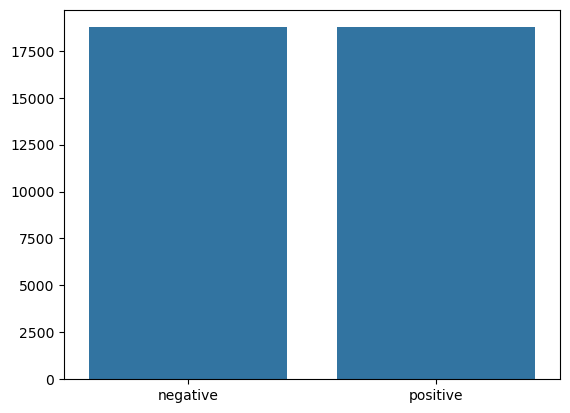

In [6]:
import matplotlib.pyplot as plt
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

In [7]:
# Preprocessing data
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from collections import Counter

def tokenize(X_train,y_train,X_test,y_test):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in X_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
 
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
   
    # tokenize
    final_list_train = [] 
    final_list_test = []
    
    for sent in X_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in X_test:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])
           
    encoded_train = [1 if label =='positive' else 0 for label in y_train]  
    encoded_test = [1 if label =='positive' else 0 for label in y_test]
    return np.array(final_list_train, dtype='object'), np.array(encoded_train, dtype='object'), np.array(final_list_test, dtype='object'), np.array(encoded_test, dtype='object'), onehot_dict

X_train,y_train,X_test,y_test,vocab = tokenize(X_train,y_train,X_test,y_test)

In [9]:
X_train

array([list([263, 240, 33, 87, 149, 303, 613, 407, 8, 270, 892, 491, 295, 4, 620, 37, 177, 117, 32, 983, 152, 534, 231, 228, 683, 117, 62, 665, 194, 628, 730, 534, 694, 40, 3, 23, 240, 613, 465, 23, 31, 314, 3, 941, 231]),
       list([20, 112, 124, 114, 147, 490, 587, 457, 3, 102, 34, 147, 3, 8, 72, 1, 1, 633, 255, 3, 13, 14, 4, 28, 382, 256, 322, 80, 504, 39, 667, 504, 28, 216, 256, 747, 78, 39, 160, 481, 427, 3, 50, 176, 19, 41, 248, 220, 10, 447, 66, 183, 304, 127, 142, 134, 351, 485, 104, 18, 97, 154, 142, 178, 111, 143, 493, 178, 26, 145, 256, 633, 22, 857, 28, 94, 148, 131, 307, 659, 28, 17, 126, 146, 202, 570, 210, 128, 910, 188, 92, 56, 44, 747, 180, 34, 571, 56, 19, 167, 3, 22, 112, 1, 458, 571, 7, 131, 34, 437, 18, 255, 2, 39, 207, 4, 3, 26, 10, 235, 9, 102, 28]),
       list([82, 151, 412, 35, 41, 38, 139, 468, 110, 162, 546, 18, 2, 1, 312, 3, 148, 565, 239, 2, 309, 91, 178, 127, 607, 435, 161, 25, 711, 121, 242, 45, 377, 8, 1, 66, 29, 134, 1, 412, 35, 41, 145, 8, 5, 2, 747

In [10]:
y_train

array([1, 0, 0, ..., 1, 1, 0], dtype=object)

In [11]:
X_test

array([list([542, 232, 76, 213, 302, 981, 3, 157, 196, 447, 655, 10, 50, 76, 4, 213, 50, 170, 13, 5, 63, 192, 50, 231, 389, 184, 17, 447, 125, 221, 403]),
       list([16, 394, 67, 190, 7, 89, 5, 385, 221, 28, 67, 394, 356, 112, 74, 9, 286, 295, 25, 6, 36, 134, 387, 34, 35, 99, 140, 42, 2, 827, 55, 31, 16, 112, 11, 333, 42, 145, 631, 393, 284, 76, 709, 558, 295, 1, 614, 166, 668]),
       list([303, 56, 38, 636, 742, 310, 869, 338, 92, 106, 855, 360, 54, 332, 458, 807, 304, 703, 147, 173, 50, 426, 541, 162, 84, 13, 716, 254, 118, 186, 123, 419, 551, 599, 346, 714, 258, 684, 123, 714, 546, 865, 95, 562, 145, 539, 374, 262, 2, 560, 14, 24, 97, 10, 333, 134, 238, 148, 988, 474, 374, 273, 27, 823, 120, 512, 160, 27, 71, 90, 694, 72, 149, 182, 64, 540, 333, 10, 238, 878, 1]),
       ...,
       list([70, 19, 44, 812, 51, 505, 168, 57, 39, 38, 15, 3, 83, 30, 173]),
       list([306, 390, 31, 213, 14, 333, 301, 271, 234, 547, 31, 213, 24, 140, 2, 13, 10, 82, 895, 61, 25, 9, 134, 741, 362, 827

In [12]:
y_test

array([1, 1, 0, ..., 1, 0, 1], dtype=object)

In [13]:
vocab

{'br': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'good': 6,
 'even': 7,
 'would': 8,
 'time': 9,
 'really': 10,
 'see': 11,
 'story': 12,
 'much': 13,
 'well': 14,
 'get': 15,
 'great': 16,
 'also': 17,
 'bad': 18,
 'people': 19,
 'first': 20,
 'dont': 21,
 'movies': 22,
 'films': 23,
 'made': 24,
 'make': 25,
 'could': 26,
 'way': 27,
 'characters': 28,
 'think': 29,
 'watch': 30,
 'many': 31,
 'seen': 32,
 'two': 33,
 'character': 34,
 'never': 35,
 'love': 36,
 'best': 37,
 'acting': 38,
 'plot': 39,
 'little': 40,
 'know': 41,
 'show': 42,
 'ever': 43,
 'life': 44,
 'better': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'end': 49,
 'man': 50,
 'scenes': 51,
 'something': 52,
 'go': 53,
 'im': 54,
 'back': 55,
 'real': 56,
 'watching': 57,
 'thing': 58,
 'didnt': 59,
 'doesnt': 60,
 'actors': 61,
 'years': 62,
 'another': 63,
 'though': 64,
 'actually': 65,
 'makes': 66,
 'funny': 67,
 'nothing': 68,
 'find': 69,
 'look': 70,
 'going': 71,
 'lot': 72,
 'new': 73,
 'every':

In [14]:
# Preparing data for the model
# Given the variable token lengths of each review, it's necessary to standardize them for consistency. 
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len), dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

x_train_pad = padding_(X_train,500)
x_test_pad = padding_(X_test,500)

In [31]:
x_train_pad = np.vstack(x_train_pad).astype(np.int64)
x_train_pad

array([[  0,   0,   0, ...,   3, 941, 231],
       [  0,   0,   0, ...,   9, 102,  28],
       [  0,   0,   0, ..., 773, 320,   9],
       ...,
       [  0,   0,   0, ..., 410, 111,  27],
       [  0,   0,   0, ..., 396,  13, 733],
       [  0,   0,   0, ...,  48,   2, 773]], dtype=int64)

In [32]:
x_test_pad = np.vstack(x_test_pad).astype(np.int64)
x_test_pad

array([[  0,   0,   0, ..., 125, 221, 403],
       [  0,   0,   0, ..., 614, 166, 668],
       [  0,   0,   0, ..., 238, 878,   1],
       ...,
       [  0,   0,   0, ...,  83,  30, 173],
       [  0,   0,   0, ..., 352,   1, 173],
       [  0,   0,   0, ..., 562,   1,   1]], dtype=int64)

In [33]:
y_train = np.vstack(y_train).astype(np.int64)
y_train

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [34]:
y_test = np.vstack(y_test).astype(np.int64)
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [35]:
import torch
import tensorflow as tf
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader 

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
                                  
test_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))
                                
# dataloaders
batch_size = 50

# Shuffling data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)


In [36]:
# Defining the Long Short-term Memory (LSTM) Model
import torch.nn as nn

class SentimentRNN(torch.nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
   
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
       
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
       
        # dropout layer
        self.dropout = nn.Dropout(0.3)
   
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
       
    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
       
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
       
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
       
        # sigmoid function
        sig_out = self.sig(out)
       
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)


        sig_out = sig_out[:, -1] # get last batch of labels
       
        # return last sigmoid output and hidden state
        return sig_out, hidden
       
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden 

In [39]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

#moving to gpu
#model = torch.tensor(model).to(device).long()
model = model.to(device)
print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [40]:
# Loss and optimization functions
import torch
from torch.optim import Adam

lr=0.001

criterion = nn.BCELoss()

#batch, dim_in, dim_h, dim_out = 128, 2000, 200, 20 

#Adam_model = torch.nn.Sequential(
    #torch.nn.Linear(dim_in, dim_h),
    #torch.nn.ReLU(),
    #torch.nn.Linear(dim_h, dim_out),
#)

#loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()


In [57]:
# Training model
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss, epoch_vl_loss = [],[]
epoch_tr_acc, epoch_vl_acc = [],[]


for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
       
        inputs, labels = inputs.to(device), labels.to(device)  
        # Creating new variables for the hidden state, otherwise
        # backprop through the entire training history
        h = tuple([each.data for each in h])
       
        model.zero_grad()
        output,h = model(inputs,h)
        #output = output.unsqueeze(1)
        
        # calculate the loss and perform backprop
        loss = criterion(output.unsqueeze(1), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
       
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in test_loader:
            val_h = tuple([each.data for each in val_h])


            inputs, labels = inputs.to(device), labels.to(device)


            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.unsqueeze(1), labels.float())


            val_losses.append(val_loss.item())
           
            accuracy = acc(output,labels)
            val_acc += accuracy
           
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(test_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), 'state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.06491731174414357 val_loss : 0.6392061161398888
train_accuracy : 97.65866666666668 val_accuracy : 84.11999999999999
Validation loss decreased (inf --> 0.639206).  Saving model ...
Epoch 2
train_loss : 0.050436905427215 val_loss : 0.7080068013072014
train_accuracy : 98.21866666666666 val_accuracy : 84.76
Epoch 3
train_loss : 0.02821305161276056 val_loss : 0.8527021537423134
train_accuracy : 99.064 val_accuracy : 84.368
Epoch 4
train_loss : 0.029391471347305922 val_loss : 0.8426391008198262
train_accuracy : 98.992 val_accuracy : 84.86399999999999
Epoch 5
train_loss : 0.023547434559208342 val_loss : 0.8584492884874344
train_accuracy : 99.232 val_accuracy : 84.608


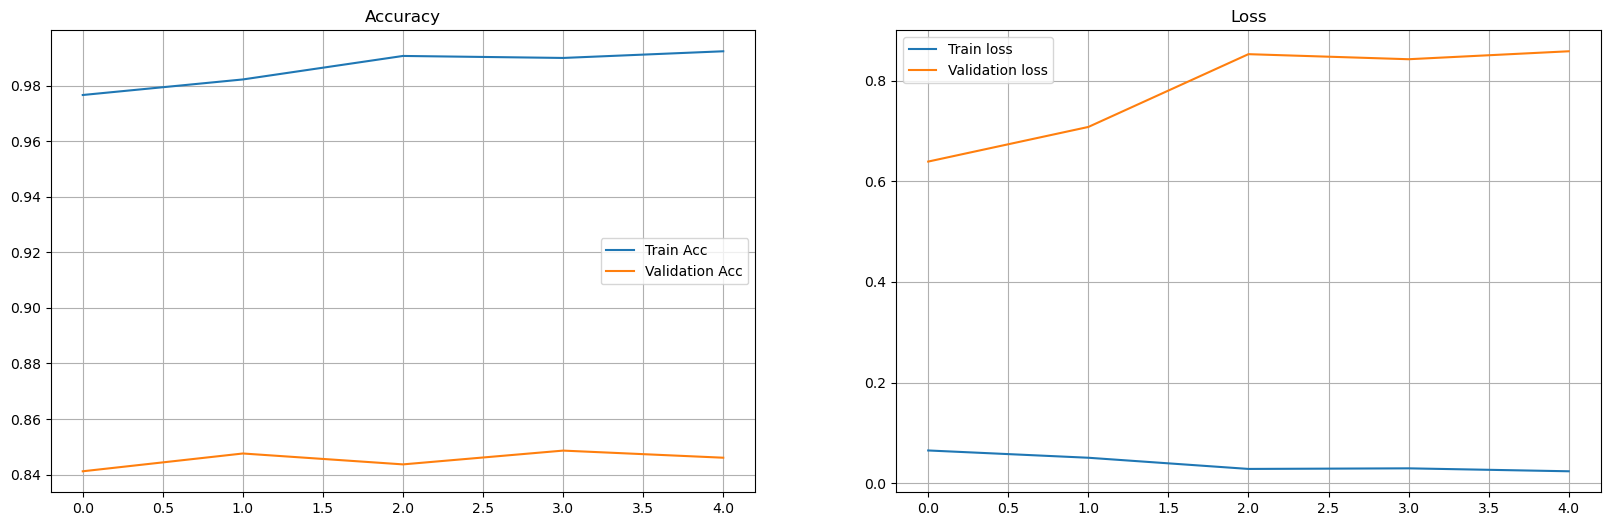

In [58]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
   
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()


plt.show()

In [60]:
def predict_text(text):
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split()
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())


index = 30
print(imdb['review'][index])
print('='*70)
print(f'Actual sentiment is  : {imdb["sentiment"][index]}')
print('='*70)
pro = predict_text(imdb['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

Taut and organically gripping, Edward Dmytryk's Crossfire is a distinctive suspense thriller, an unlikely "message" movie using the look and devices of the noir cycle.<br /><br />Bivouacked in Washington, DC, a company of soldiers cope with their restlessness by hanging out in bars. Three of them end up at a stranger's apartment where Robert Ryan, drunk and belligerent, beats their host (Sam Levene) to death because he happens to be Jewish. Police detective Robert Young investigates with the help of Robert Mitchum, who's assigned to Ryan's outfit. Suspicion falls on the second of the three (George Cooper), who has vanished. Ryan slays the third buddy (Steve Brodie) to insure his silence before Young closes in.<br /><br />Abetted by a superior script by John Paxton, Dmytryk draws precise performances from his three starring Bobs. Ryan, naturally, does his prototypical Angry White Male (and to the hilt), while Mitchum underplays with his characteristic alert nonchalance (his role, howeve